In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def process_data():
    f = open('geyser.csv','r')
    fout = open('geyser_cleaned.csv','w')

    i = 0
    for line in f.readlines():

        if '#' in line:
            continue

        if i == 0:
            fout.write(line) # head
            i += 1
            continue

        line = line.replace('l','1').replace('O','0').replace('E','3')
        strnums = [line[:5],line[6:]]
        if '.' not in strnums[0]:
            strnums[0] = strnums[0][:1] + '.' + strnums[0][2:]

        nums = None   
        try:
            nums = [float(strnums[0]),int(strnums[1])]
            fout.write('%.3f,%02d\n'%(nums[0],nums[1]))
        except:
            print('Error in line %d: %s'%(i+1,strnums))

        i += 1
    f.close()
    fout.close()

In [3]:
if not os.path.exists('geyser_cleaned.csv'):
    process_data()
data = pd.read_csv('geyser_cleaned.csv').drop_duplicates()
data_describe = data.describe()
data_describe

,eruptions,waiting
count,256.00000,256.000000
mean,3.49868,70.886719
std,1.12986,14.045265
min,1.60000,5.000000
25%,2.19575,59.000000
50%,4.00000,76.000000
75%,4.45000,82.000000
max,5.10000,96.000000


In [4]:
def fences(Q1,Q3):
    IQR = Q3-Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
    
    return lower, upper

In [5]:
eruption_fences = fences(data_describe.loc['25%','eruptions'],data_describe.loc['75%','eruptions'])
waiting_fences = fences(data_describe.loc['25%','waiting'],data_describe.loc['75%','waiting'])

out_erup_1 = data['eruptions'] < eruption_fences[0]
out_erup_2 = data['eruptions'] > eruption_fences[1]

out_wait_1 = data['waiting'] < waiting_fences[0]
out_wait_2 = data['waiting'] > waiting_fences[1]

outliers = data[out_erup_1 | out_erup_2 | out_wait_1 | out_wait_2]
outliers

,eruptions,waiting
116,2.317,5


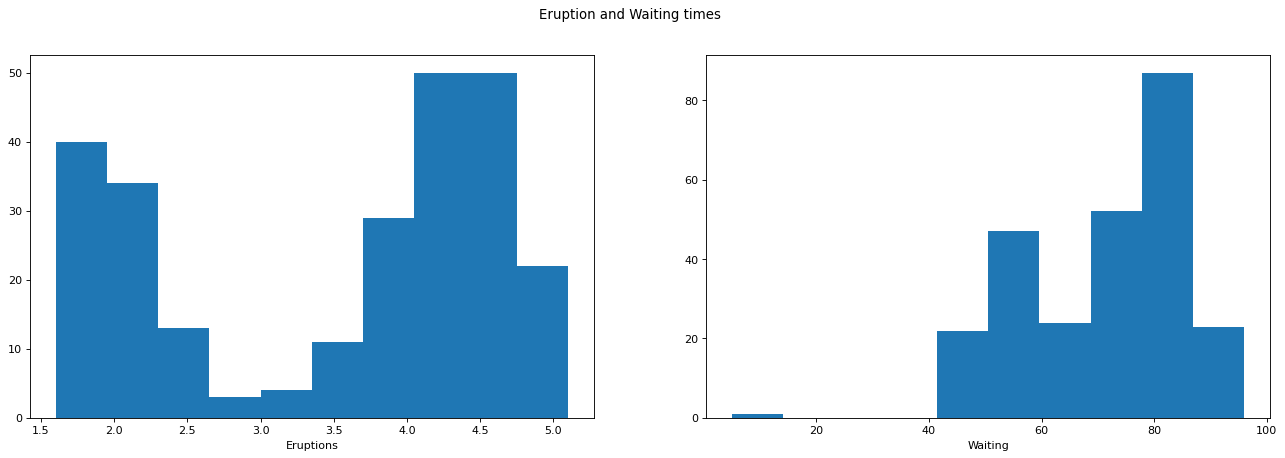

In [6]:
fig = plt.figure(figsize=(20,6),dpi=80)
ax = fig.subplots(1,2)

ax[0].hist(data['eruptions'],bins=10)
ax[1].hist(data['waiting'],bins=10)
ax[0].set_xlabel('Eruptions')
ax[1].set_xlabel('Waiting')

fig.suptitle('Eruption and Waiting times')
fig.savefig('bad_plot.png')

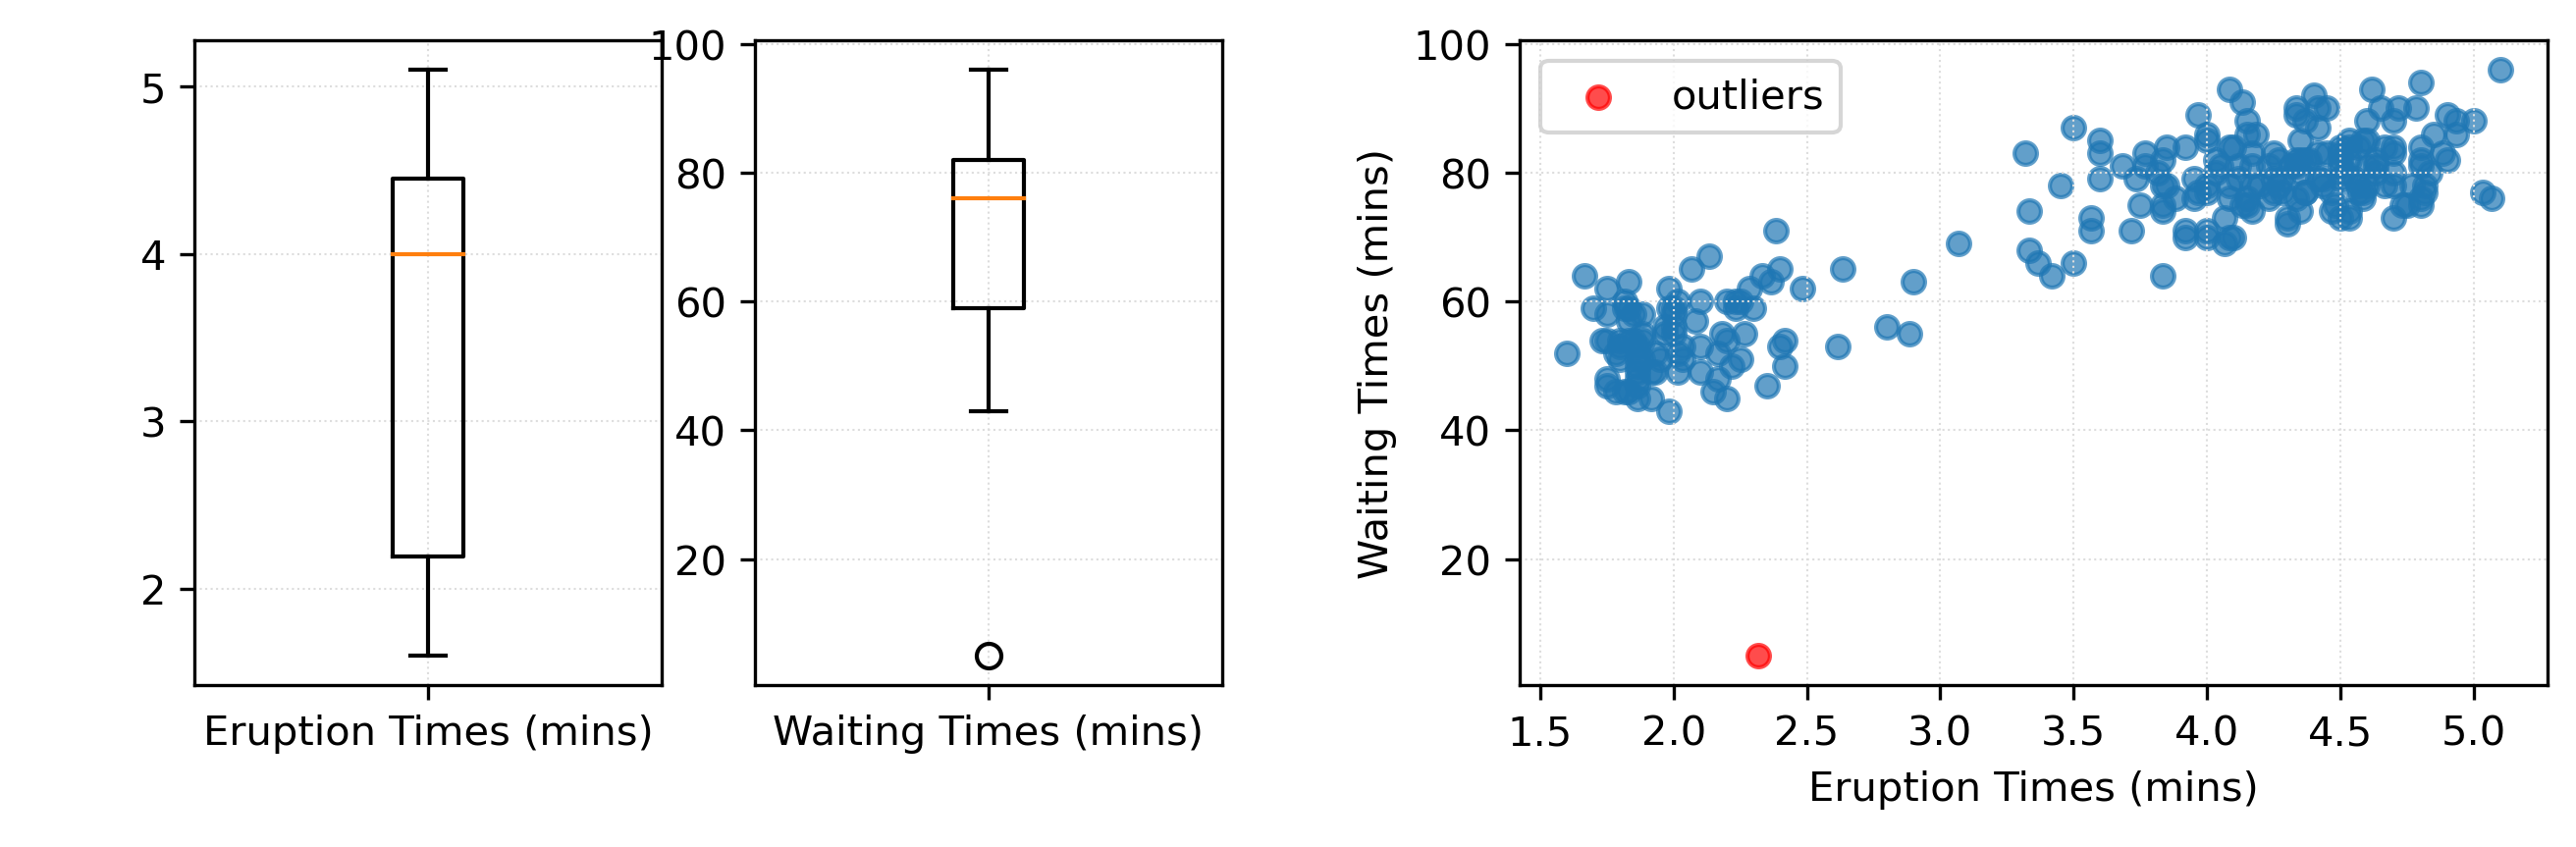

In [7]:
fig = plt.figure(figsize=(9,3),dpi=300)
fig_box,fig_scatter = fig.subfigures(1,2)

ax_box = fig_box.subplots(1,2)
ax_box[0].boxplot(data['eruptions'], labels = ['Eruption Times (mins)'])
ax_box[1].boxplot(data['waiting'], labels = ['Waiting Times (mins)'])
ax_box[0].grid(color='#DDDDDD', linestyle=':', linewidth=0.5)
ax_box[1].grid(color='#DDDDDD', linestyle=':', linewidth=0.5)

subdata = data.drop(outliers.index)

ax_scatter = fig_scatter.subplots(1,1)
ax_scatter.scatter(subdata['eruptions'],subdata['waiting'], s = 30, alpha = 0.7)
ax_scatter.scatter(outliers['eruptions'],outliers['waiting'], s = 30, alpha = 0.7, color = 'r', label = 'outliers')
ax_scatter.set_xlabel('Eruption Times (mins)')
ax_scatter.set_ylabel('Waiting Times (mins)')
ax_scatter.legend()
ax_scatter.grid(color='#DDDDDD', linestyle=':', linewidth=0.5)

plt.subplots_adjust(bottom=0.15)
fig.savefig('good_plot_w.png')

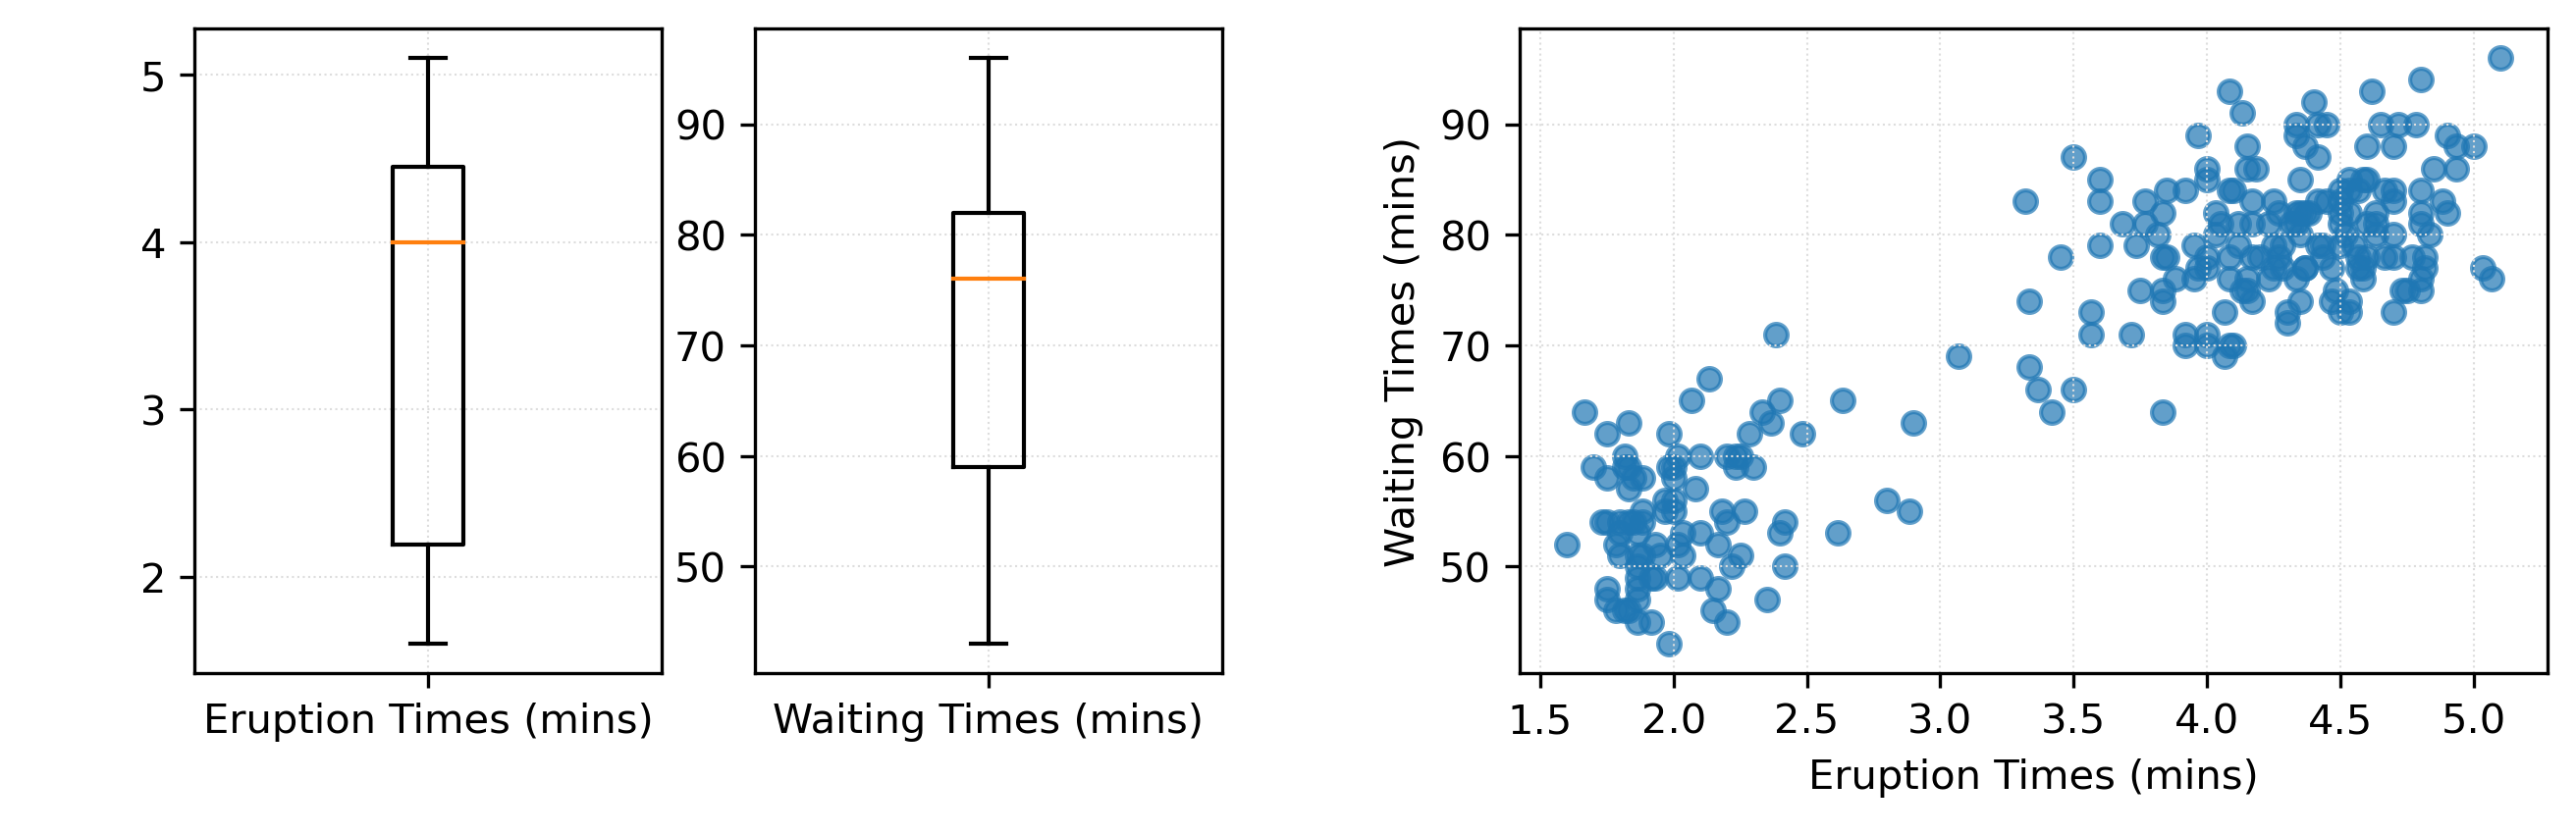

In [8]:
fig = plt.figure(figsize=(9,3),dpi=300)
fig_box,fig_scatter = fig.subfigures(1,2)

ax_box = fig_box.subplots(1,2)
ax_box[0].boxplot(subdata['eruptions'], labels = ['Eruption Times (mins)'])
ax_box[1].boxplot(subdata['waiting'], labels = ['Waiting Times (mins)'])
ax_box[0].grid(color='#DDDDDD', linestyle=':', linewidth=0.5)
ax_box[1].grid(color='#DDDDDD', linestyle=':', linewidth=0.5)



ax_scatter = fig_scatter.subplots(1,1)
ax_scatter.scatter(subdata['eruptions'],subdata['waiting'], s = 30, alpha = 0.7)
ax_scatter.set_xlabel('Eruption Times (mins)')
ax_scatter.set_ylabel('Waiting Times (mins)')
ax_scatter.grid(color='#DDDDDD', linestyle=':', linewidth=0.5)

plt.subplots_adjust(bottom=0.15)
fig.savefig('good_plot_wo.png')